<a href="https://colab.research.google.com/github/AARYAK12345/EDA-ASSIGNMENT/blob/main/EDA_THEORY_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset (replace 'credit card.csv' with the actual file name if it's different)
file_path = '/content/credit card.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

  Personal Loan Securities Account CD Account  Online CreditCard  
0             0                  1          0       0          0  
1             0                  1          0       0          0  
2             0                  0          0       0          0  
3             0                  0          0       0          0  
4             0                  0          0       0          1

MODULE 1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   object 
 10  Securities Account  5000 non-null   object 
 11  CD Account          5000 non-null   object 
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   object 
dtypes: float64(1), int64(9), object(4)
memory usage: 547.0+ KB
Missing Values:
 ID                    0
Age 

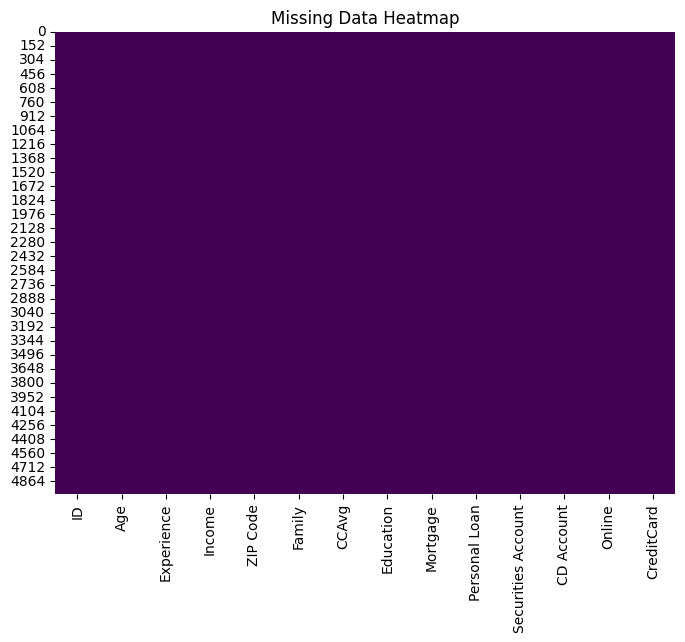

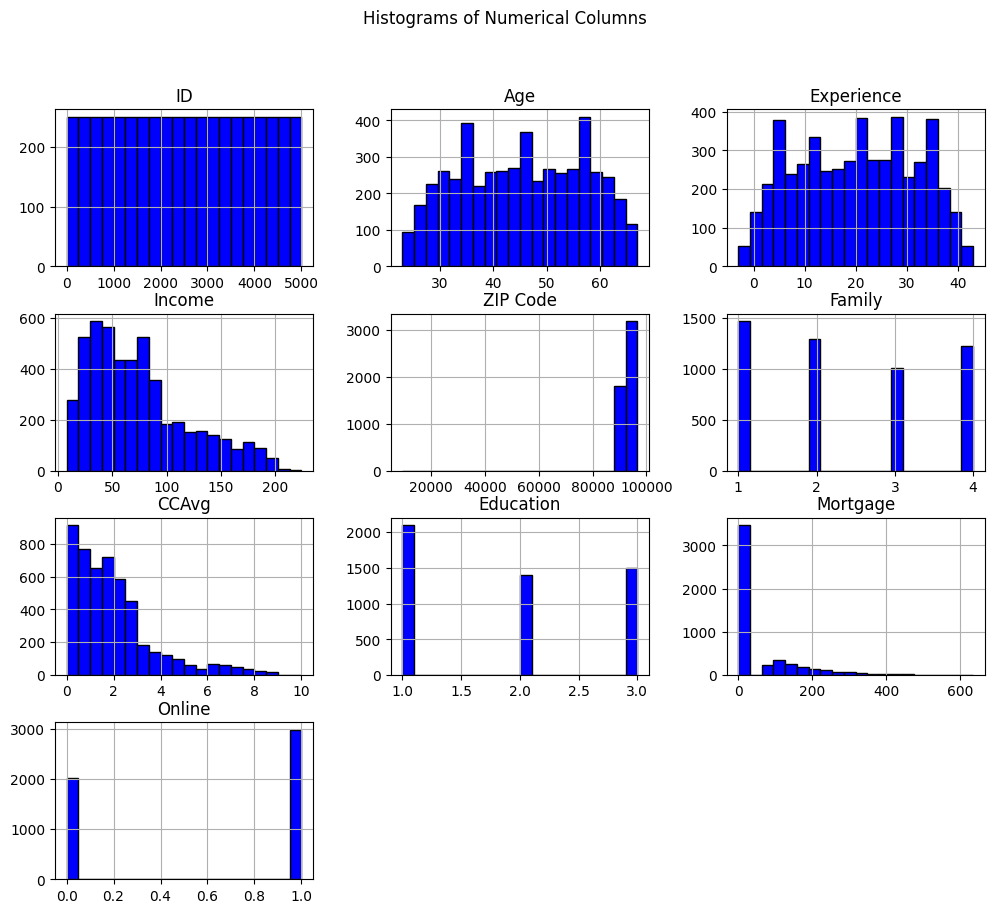

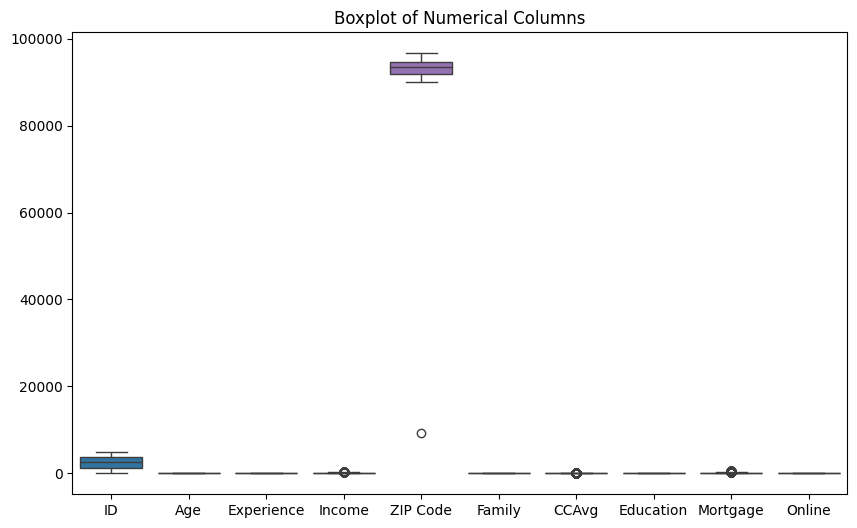

Value counts for Personal Loan:
 Personal Loan
0    4509
1     480
?      11
Name: count, dtype: int64
Value counts for Securities Account:
 Securities Account
0    4477
1     522
?       1
Name: count, dtype: int64
Value counts for CD Account:
 CD Account
0    4696
1     302
?       2
Name: count, dtype: int64
Value counts for CreditCard:
 CreditCard
0    3529
1    1470
?       1
Name: count, dtype: int64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/credit card.csv')

# 1. Display dataset info
data.info()

# 2. Check for null values
print("Missing Values:\n", data.isnull().sum())

# 3. Summarize data types
print("Data Types:\n", data.dtypes)

# 4. Generate summary statistics for numerical columns
print("Summary Statistics:\n", data.describe())

# 5. Unique values in categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:\n", data[col].unique())

# 6. Missing data percentage
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Missing Percentage:\n", missing_percentage)

# 7. Visualize missing data
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

# 8. Histograms for numerical columns
data.hist(figsize=(12, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")
plt.show()

# 9. Boxplot of numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplot of Numerical Columns")
plt.show()

# 10. Value counts for categorical columns
for col in categorical_columns:
    print(f"Value counts for {col}:\n", data[col].value_counts())


MODULE 2


In [3]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Identify duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# 2. Remove duplicate rows
data_cleaned = data.drop_duplicates()

# 3. Replace '?' with NaN in categorical columns
data_cleaned.replace("?", np.nan, inplace=True)

# 4. Replace missing values in numerical columns with mean
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
data_cleaned[numerical_columns] = imputer.fit_transform(data_cleaned[numerical_columns])

# 5. Replace missing values in categorical columns with mode
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
imputer_mode = SimpleImputer(strategy='most_frequent')
data_cleaned[categorical_columns] = imputer_mode.fit_transform(data_cleaned[categorical_columns])

# 6. Bin income column into ranges
data_cleaned['Income_Binned'] = pd.cut(data_cleaned['Income'], bins=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])

# 7. Create new feature: Income per family member
data_cleaned['Income_per_Family'] = data_cleaned['Income'] / data_cleaned['Family']

# 8. Normalize numerical columns
scaler = StandardScaler()
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# 9. Encode categorical variables
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# 10. Check the updated dataset
print("Cleaned and Transformed Data:\n", data_encoded.head())


Number of duplicate rows: 0
Cleaned and Transformed Data:
          ID       Age  Experience    Income  ZIP Code    Family     CCAvg  \
0 -1.731704 -1.774417   -1.666078 -0.538229 -0.964114  1.397414 -0.193385   
1 -1.731012 -0.029524   -0.096330 -0.864109 -1.443932  0.525991 -0.250611   
2 -1.730319 -0.552992   -0.445163 -1.363793  0.738814 -1.216855 -0.536736   
3 -1.729626 -0.901970   -0.968413  0.569765  0.452243 -1.216855  0.436091   
4 -1.728933 -0.901970   -1.055621 -0.625130 -0.859007  1.397414 -0.536736   

   Education  Mortgage    Online Income_Binned  Income_per_Family  \
0  -1.049078 -0.555524 -1.216618      Very Low          12.250000   
1  -1.049078 -0.555524 -1.216618      Very Low          11.333333   
2  -1.049078 -0.555524 -1.216618      Very Low          11.000000   
3   0.141703 -0.555524 -1.216618        Medium         100.000000   
4   0.141703 -0.555524 -1.216618      Very Low          11.250000   

   Personal Loan_1  Securities Account_1  CD Account_1  CreditC

MODULE 3


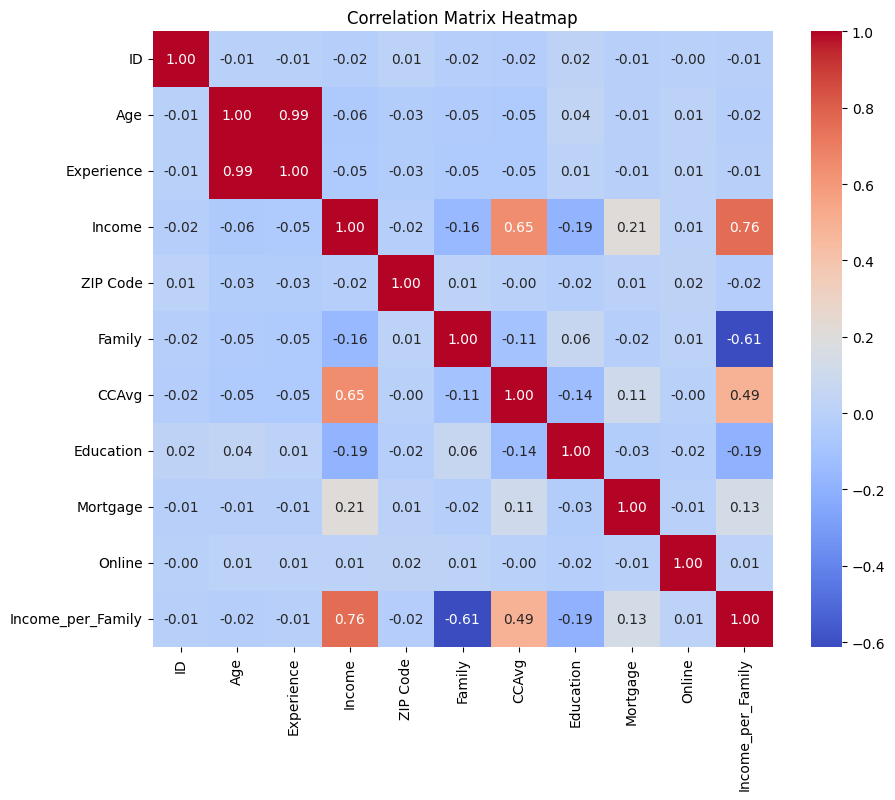

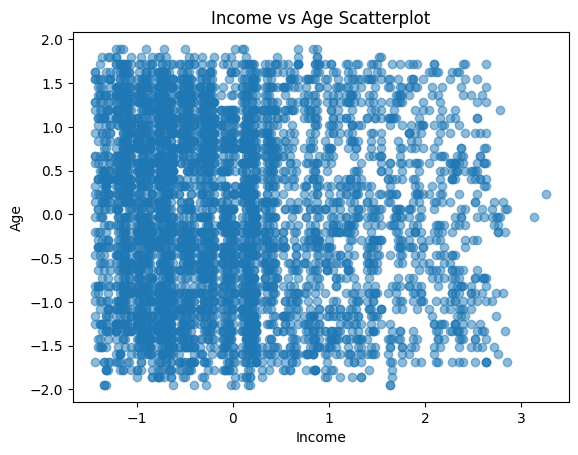

Covariance Matrix:
                          ID       Age  Experience     Income  ZIP Code  \
ID                 1.000200 -0.008474   -0.008327  -0.017698  0.013434   
Age               -0.008474  1.000200    0.994414  -0.055280 -0.029222   
Experience        -0.008327  0.994414    1.000200  -0.046583 -0.028631   
Income            -0.017698 -0.055280   -0.046583   1.000200 -0.016413   
ZIP Code           0.013434 -0.029222   -0.028631  -0.016413  1.000200   
Family            -0.016801 -0.046427   -0.052574  -0.157532  0.011781   
CCAvg             -0.024680 -0.052023   -0.050087   0.646113 -0.004061   
Education          0.021468  0.041343    0.013154  -0.187562 -0.017380   
Mortgage          -0.013923 -0.012541   -0.010584   0.206848  0.007385   
Online            -0.002529  0.013705    0.013901   0.014209  0.016993   
Income_per_Family -0.527045 -0.735152   -0.360409  29.898085 -0.967207   

                      Family      CCAvg  Education  Mortgage    Online  \
ID               

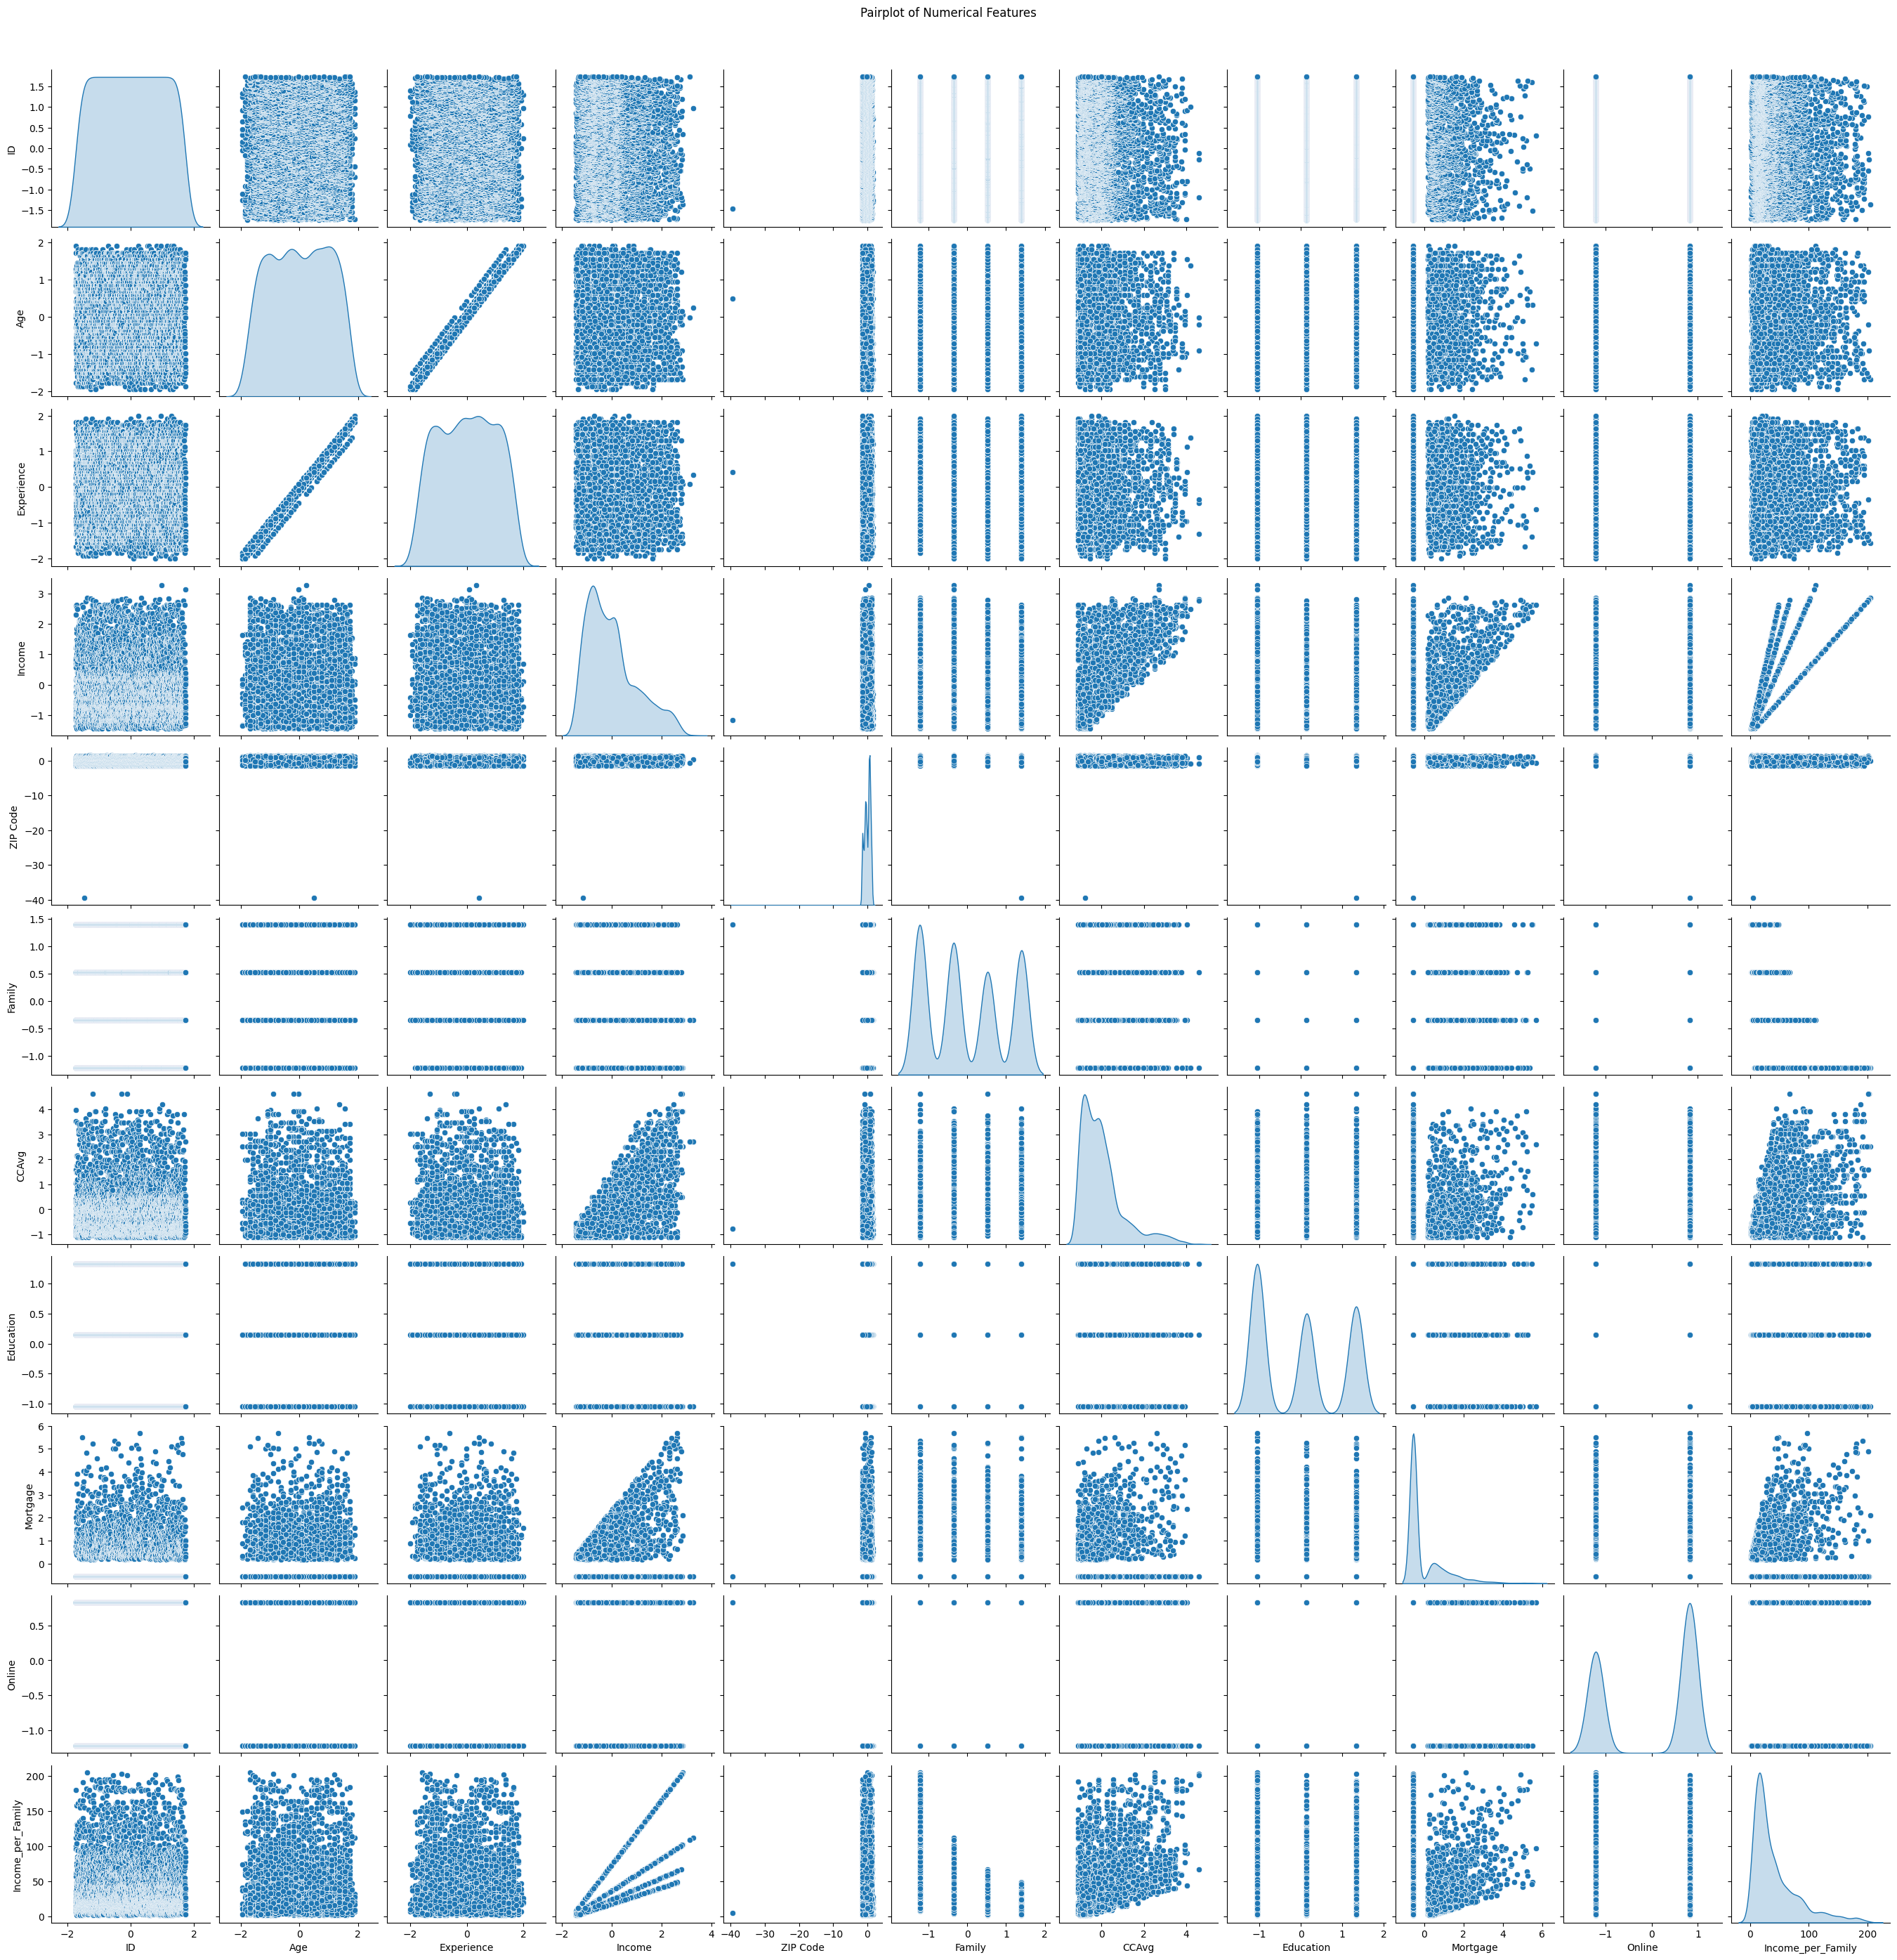

Average Income by Education:
 Education
-1.049078    0.256623
 0.141703   -0.205535
 1.332484   -0.166234
Name: Income, dtype: float64
Cross Tabulation:
 Personal Loan     0    1
Family                  
-1.216855      1365  107
-0.345432      1190  106
 0.525991       877  133
 1.397414      1088  134
Column 'Time' not found for time-based analysis!
Group Statistics:
                 Age              Income          
               mean       std      mean       std
Education                                        
-1.049078 -0.032687  0.993399  0.256623  1.070865
 0.141703 -0.026041  1.010472 -0.205535  0.891259
 1.332484  0.069985  0.996830 -0.166234  0.911082


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset is already cleaned and encoded as 'data_encoded' (as in Module 2)

# 1. Drop non-numeric columns before computing correlation
numeric_data = data_encoded.select_dtypes(include=['int64', 'float64'])

# 2. Compute correlation matrix
correlation_matrix = numeric_data.corr()

# 3. Visualize correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# 4. Scatterplot between two key numerical features (e.g., 'Income' vs 'Age')
if 'Income' in data_cleaned.columns and 'Age' in data_cleaned.columns:
    plt.scatter(data_cleaned['Income'], data_cleaned['Age'], alpha=0.5)
    plt.xlabel("Income")
    plt.ylabel("Age")
    plt.title("Income vs Age Scatterplot")
    plt.show()
else:
    print("Columns 'Income' and 'Age' not found in the dataset!")

# 5. Compute Covariance matrix
covariance_matrix = numeric_data.cov()
print("Covariance Matrix:\n", covariance_matrix)

# 6. Pairplot for multivariate relationships
# Ensure there are enough columns for plotting; otherwise, filter for relevant numerical data
sns.pairplot(data_cleaned.select_dtypes(include=['int64', 'float64']), diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# 7. Grouped statistics by a categorical variable (e.g., Education)
if 'Education' in data_cleaned.columns and 'Income' in data_cleaned.columns:
    education_groups = data_cleaned.groupby('Education')['Income'].mean()
    print("Average Income by Education:\n", education_groups)
else:
    print("Columns 'Education' and/or 'Income' not found for grouping!")

# 8. Bivariate Analysis: Cross-tabulation
if 'Family' in data_cleaned.columns and 'Personal Loan' in data_cleaned.columns:
    crosstab = pd.crosstab(data_cleaned['Family'], data_cleaned['Personal Loan'])
    print("Cross Tabulation:\n", crosstab)
else:
    print("Columns 'Family' and/or 'Personal Loan' not found for cross-tabulation!")

# 9. Time-based index analysis (only applicable if a 'Time' column exists)
if 'Time' in data_cleaned.columns:
    data_cleaned['Time'] = pd.to_datetime(data_cleaned['Time'], errors='coerce')  # Ensure valid datetime
    data_cleaned.set_index('Time', inplace=True)
    data_cleaned['Income'].resample('M').mean().plot()
    plt.title("Monthly Average Income")
    plt.xlabel("Month")
    plt.ylabel("Average Income")
    plt.show()
else:
    print("Column 'Time' not found for time-based analysis!")

# 10. Statistical description of numerical groups
if 'Education' in data_cleaned.columns and 'Age' in data_cleaned.columns:
    stats = data_cleaned.groupby('Education')[['Age', 'Income']].agg(['mean', 'std'])
    print("Group Statistics:\n", stats)
else:
    print("Columns 'Education' and/or 'Age' not found for statistical group analysis!")


MODULE 4


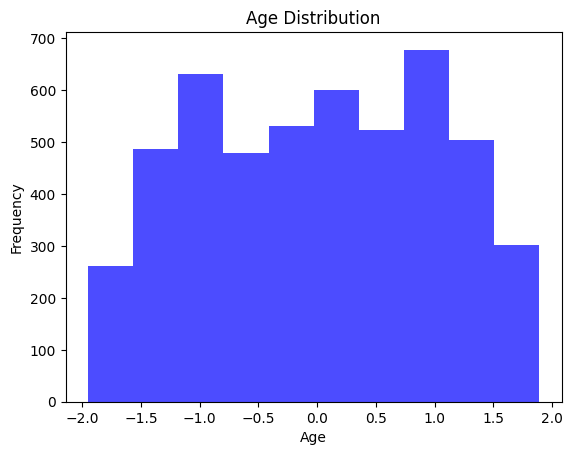

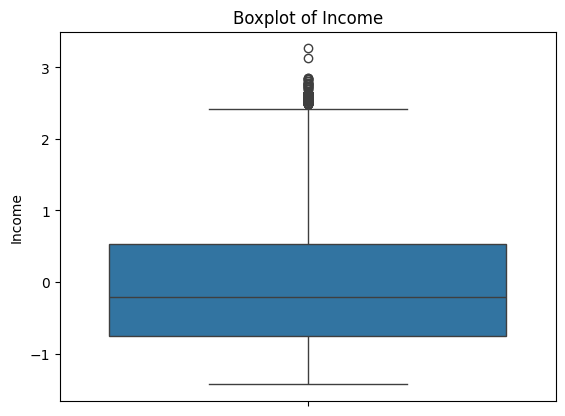

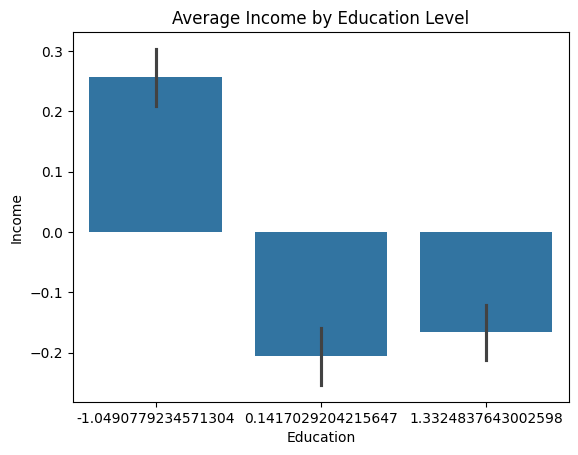

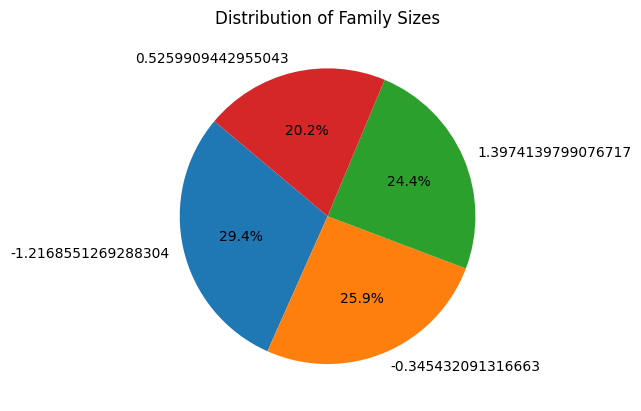

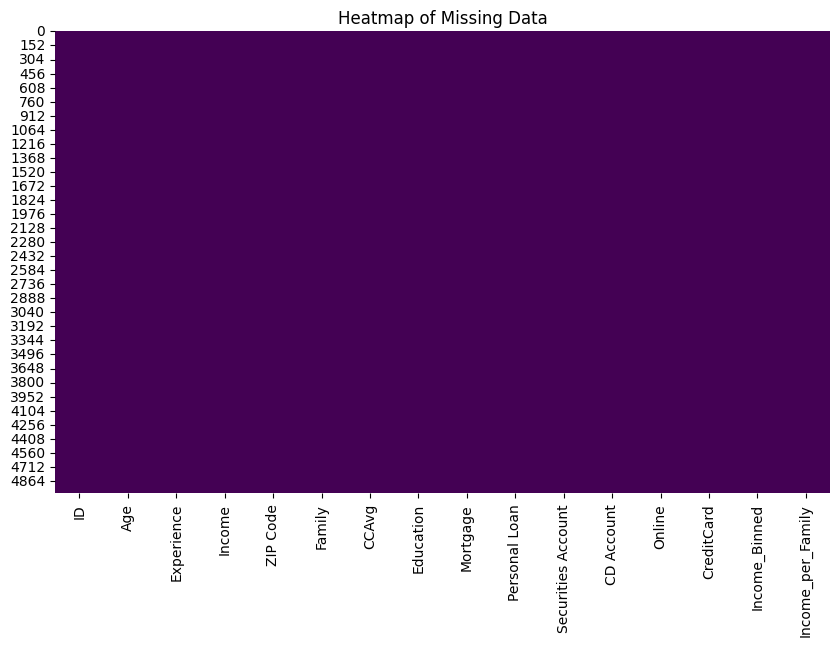

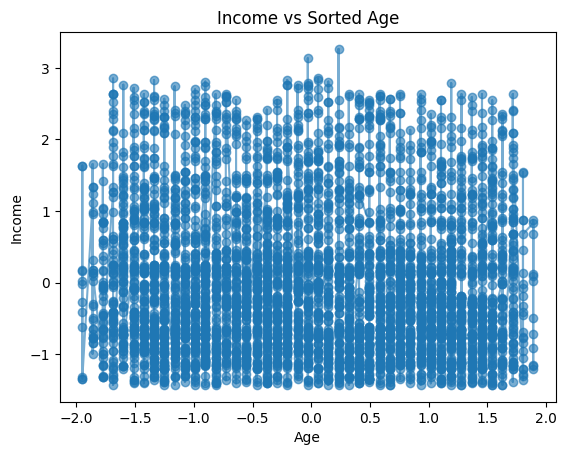

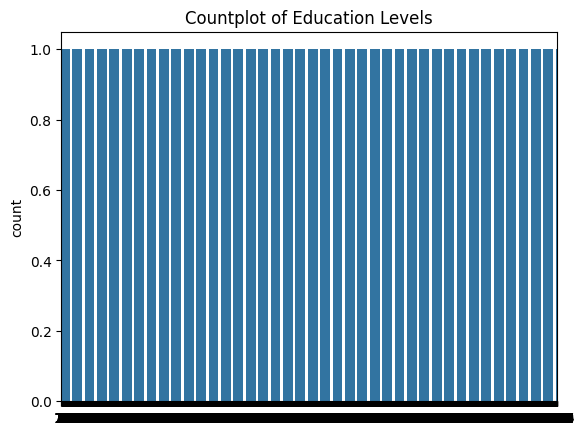

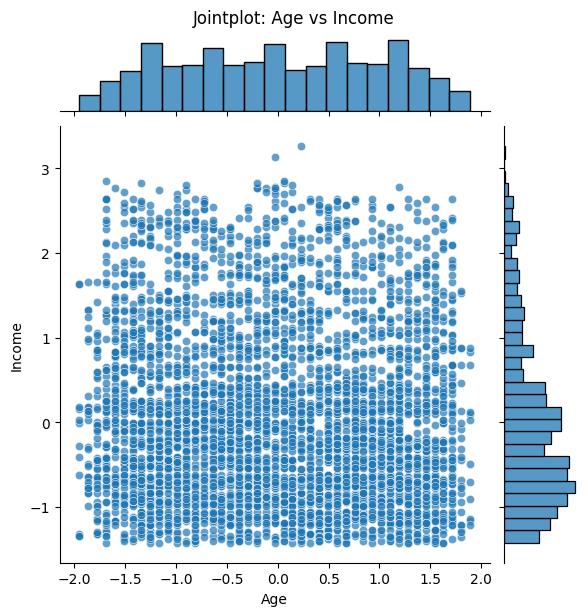

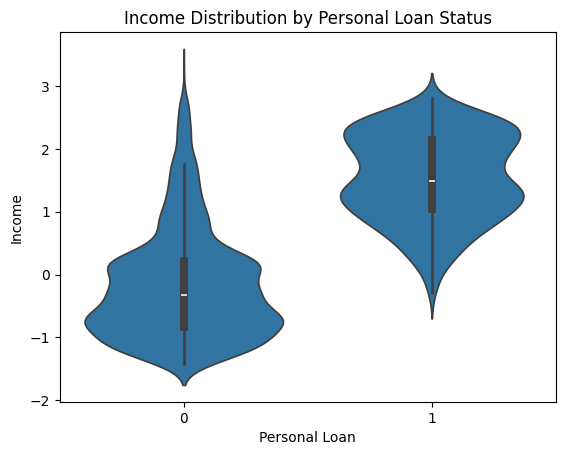

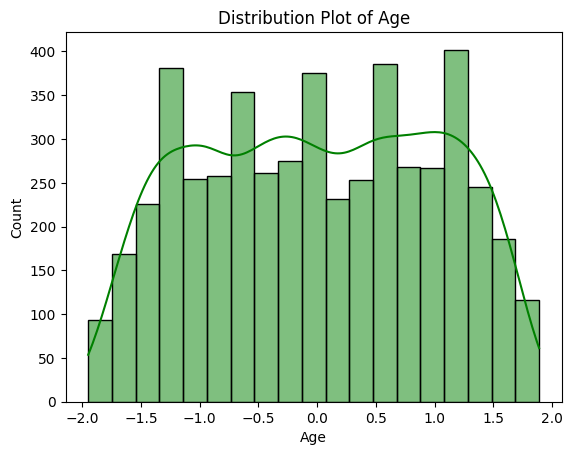

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for Age
plt.hist(data_cleaned['Age'], bins=10, alpha=0.7, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 2. Boxplot for Income
sns.boxplot(data_cleaned['Income'])
plt.title("Boxplot of Income")
plt.show()

# 3. Barplot for Education vs Income
sns.barplot(x='Education', y='Income', data=data_cleaned)
plt.title("Average Income by Education Level")
plt.show()

# 4. Pie chart for Family sizes
family_counts = data_cleaned['Family'].value_counts()
plt.pie(family_counts, labels=family_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Family Sizes")
plt.show()

# 5. Heatmap for Missing Data (if applicable)
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Data")
plt.show()

# 6. Line plot for Income over sorted Age
sorted_data = data_cleaned.sort_values(by='Age')
plt.plot(sorted_data['Age'], sorted_data['Income'], marker='o', linestyle='-', alpha=0.6)
plt.title("Income vs Sorted Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

# 7. Countplot for Education
sns.countplot(data_cleaned['Education'])
plt.title("Countplot of Education Levels")
plt.show()

# 8. Jointplot for Age and Income
sns.jointplot(x='Age', y='Income', data=data_cleaned, kind='scatter', alpha=0.7)
plt.suptitle("Jointplot: Age vs Income", y=1.02)
plt.show()

# 9. Violin Plot for Income grouped by Personal Loan
sns.violinplot(x='Personal Loan', y='Income', data=data_cleaned)
plt.title("Income Distribution by Personal Loan Status")
plt.show()

# 10. Distribution Plot for Age
sns.histplot(data_cleaned['Age'], kde=True, color='green')
plt.title("Distribution Plot of Age")
plt.show()


MODULE 5


In [7]:
# 1. Create a new feature: Income per Family Member
data_cleaned['Income_per_Family'] = data_cleaned['Income'] / data_cleaned['Family']
print("Income per Family Member added.\n", data_cleaned.head())

# 2. Create an Age Group feature
bins = [0, 18, 35, 50, 65, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Senior', 'Elder']
data_cleaned['Age_Group'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels)
print("Age Groups added.\n", data_cleaned['Age_Group'].value_counts())

# 3. Binarize Personal Loan (0 for No, 1 for Yes)
data_cleaned['Personal_Loan_Binary'] = data_cleaned['Personal Loan'].apply(lambda x: 1 if x == 'Yes' else 0)
print("Binarized Personal Loan column added.")

# 4. Encoding categorical variables (Education)
data_cleaned = pd.get_dummies(data_cleaned, columns=['Education'], drop_first=True)
print("Encoded Education column added.\n", data_cleaned.head())

# 5. Log transformation for skewed features (e.g., Income)
data_cleaned['Log_Income'] = np.log1p(data_cleaned['Income'])
print("Log-transformed Income added.\n", data_cleaned.head())

# 6. Polynomial features for Age
data_cleaned['Age_Squared'] = data_cleaned['Age'] ** 2
data_cleaned['Age_Cubed'] = data_cleaned['Age'] ** 3
print("Polynomial features for Age added.\n", data_cleaned[['Age', 'Age_Squared', 'Age_Cubed']].head())

# 7. Interaction features (Income x Age)
data_cleaned['Income_Age'] = data_cleaned['Income'] * data_cleaned['Age']
print("Interaction feature (Income x Age) added.")

# 8. Normalize Income
data_cleaned['Normalized_Income'] = (data_cleaned['Income'] - data_cleaned['Income'].mean()) / data_cleaned['Income'].std()
print("Normalized Income added.")

# 9. One-hot encoding for Family size
data_cleaned = pd.get_dummies(data_cleaned, columns=['Family'], drop_first=True)
print("One-hot encoded Family size added.\n", data_cleaned.head())

# 10. Drop redundant or irrelevant columns
columns_to_drop = ['Personal Loan', 'Income']
data_cleaned = data_cleaned.drop(columns=columns_to_drop, axis=1)
print("Dropped redundant columns:", columns_to_drop)


Income per Family Member added.
          ID       Age  Experience    Income  ZIP Code    Family     CCAvg  \
0 -1.731704 -1.774417   -1.666078 -0.538229 -0.964114  1.397414 -0.193385   
1 -1.731012 -0.029524   -0.096330 -0.864109 -1.443932  0.525991 -0.250611   
2 -1.730319 -0.552992   -0.445163 -1.363793  0.738814 -1.216855 -0.536736   
3 -1.729626 -0.901970   -0.968413  0.569765  0.452243 -1.216855  0.436091   
4 -1.728933 -0.901970   -1.055621 -0.625130 -0.859007  1.397414 -0.536736   

   Education  Mortgage Personal Loan Securities Account CD Account    Online  \
0  -1.049078 -0.555524             0                  1          0 -1.216618   
1  -1.049078 -0.555524             0                  1          0 -1.216618   
2  -1.049078 -0.555524             0                  0          0 -1.216618   
3   0.141703 -0.555524             0                  0          0 -1.216618   
4   0.141703 -0.555524             0                  0          0 -1.216618   

  CreditCard Income_Bin

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


MODULE 6


PCA Explained Variance Ratios:
 [0.25513188 0.22410656 0.12570334 0.12371704 0.11545661]
Cumulative Explained Variance Ratios:
 [0.25513188 0.47923844 0.60494177 0.72865881 0.84411542]


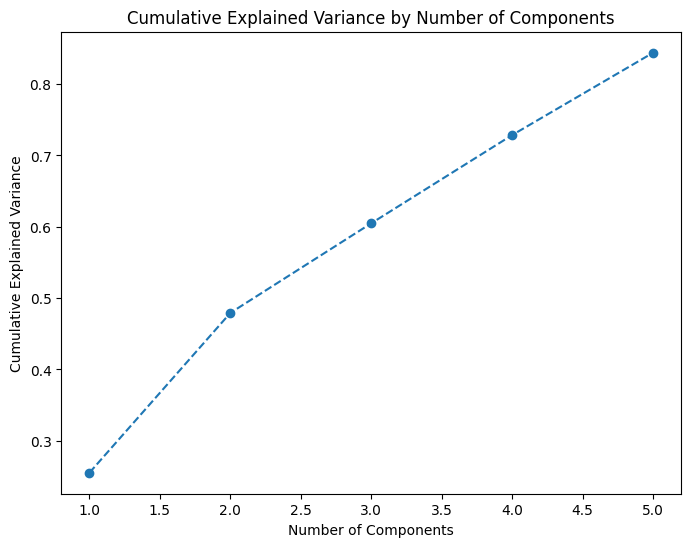

KMeans Clustering added:
 Cluster
2    2126
1    2022
0     852
Name: count, dtype: int64


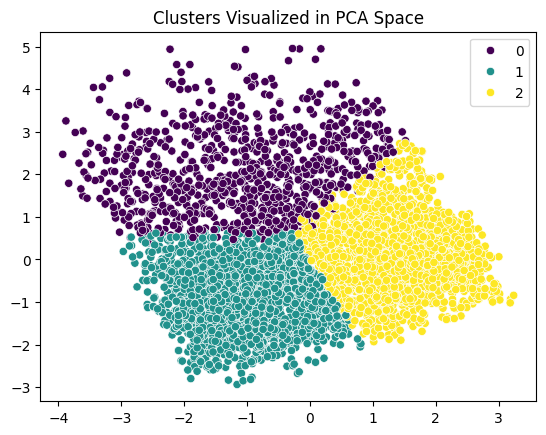

Linear Regression Coefficients:
 [0.0005083  0.00322214]
Logistic Regression Accuracy: 0.9072
Random Forest Accuracy: 0.9802


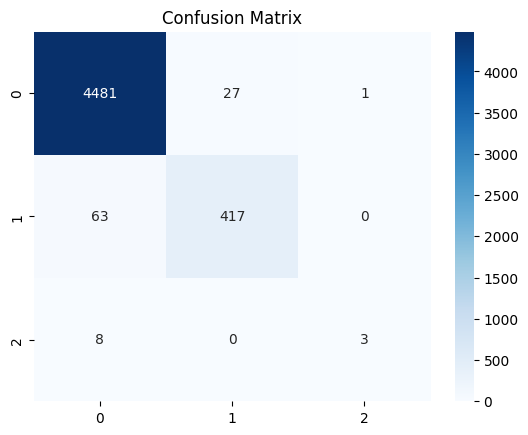

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing the data
data_cleaned = data.copy()

# Encoding categorical columns as needed
categorical_columns = ['Personal Loan', 'Securities Account', 'CD Account', 'CreditCard']
for col in categorical_columns:
    data_cleaned[col] = LabelEncoder().fit_transform(data_cleaned[col])

# Define features and target
features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Online']
target = 'Personal Loan'

# Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned[features])

# Step 1: Handle missing values
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Step 2: PCA for dimensionality reduction
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_data_imputed)
print("PCA Explained Variance Ratios:\n", pca.explained_variance_ratio_)

# Step 3: Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance Ratios:\n", cumulative_variance)

# Step 4: Visualize cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

# Step 5: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data_imputed)
data_cleaned['Cluster'] = clusters
print("KMeans Clustering added:\n", data_cleaned['Cluster'].value_counts())

# Visualize Clusters in PCA space
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis')
plt.title("Clusters Visualized in PCA Space")
plt.show()

# Step 6: Linear Regression
X = data_cleaned[['Age', 'Income']]
y = data_cleaned[target]
linear_model = LinearRegression()
linear_model.fit(X, y)
print("Linear Regression Coefficients:\n", linear_model.coef_)

# Step 7: Logistic Regression
log_model = LogisticRegression()
log_model.fit(X, y)
print("Logistic Regression Accuracy:", log_model.score(X, y))

# Step 8: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
print("Random Forest Accuracy:", rf_model.score(X, y))

# Step 9: Confusion Matrix
predictions = rf_model.predict(X)
conf_matrix = confusion_matrix(y, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



In [17]:
print(data_cleaned.columns)


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Cluster'],
      dtype='object')


MODULE 7


Accuracy: 0.989
Precision: 0.9870283496990815
Recall: 0.989
F1 Score: 0.9878724041878781
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       893
           1       0.99      0.92      0.96       105
           2       0.00      0.00      0.00         2

    accuracy                           0.99      1000
   macro avg       0.66      0.64      0.65      1000
weighted avg       0.99      0.99      0.99      1000



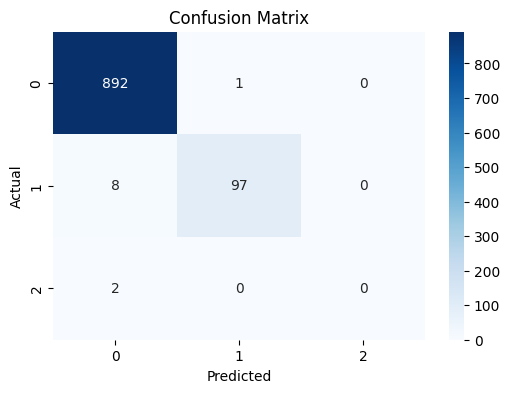

ROC Curve is not plotted as the task is multiclass.
Cross-Validation Scores: [0.559 0.982 0.982 0.986 0.976]
Mean Cross-Validation Score: 0.8969999999999999


In [19]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target column
target_column = 'Personal Loan'  # Corrected target column name

# Splitting the data into features (X) and target (y)
X = data_cleaned.drop(columns=[target_column], axis=1)
y = data_cleaned[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:\n", class_report)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
if len(rf_model.classes_) == 2:  # Only for binary classification
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
else:
    print("ROC Curve is not plotted as the task is multiclass.")

# Cross-Validation Scores
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
